## EDA

## Análisis Exploratorio de Datos sobre los jugadores de FIFA 19

### Conjunto de datos

La base de datos fifa_eda contiene información detallada de 18,208 jugadores del videojuego FIFA 19, distribuidos en 18 variables. Cada observación representa un jugador con datos sobre su rendimiento, características físicas, valor de mercado y contrato. Esta base resulta ideal para análisis exploratorios del talento futbolístico internacional.

### Descripción de las variables

| **Variable**               | **Descripción**                                                                 |
|---------------------------|---------------------------------------------------------------------------------|
| `ID`                      | Identificador único del jugador.                                               |
| `Name`                    | Nombre del jugador.                                                            |
| `Age`                     | Edad del jugador (en años).                                                    |
| `Nationality`             | Nacionalidad del jugador.                                                      |
| `Overall`                 | Valoración general del jugador (0-100).                                        |
| `Potential`               | Valoración máxima que puede alcanzar el jugador.                               |
| `Club`                    | Club al que pertenece el jugador.                                              |
| `Value`                   | Valor de mercado estimado del jugador (en euros, originalmente en miles).      |
| `Wage`                    | Salario semanal del jugador (en euros, originalmente en miles).                |
| `Preferred Foot`          | Pie dominante del jugador (Izquierdo o Derecho).                               |
| `International Reputation`| Reputación internacional (escala de 1 a 5).                                    |
| `Skill Moves`             | Nivel de habilidad en filigranas (escala de 1 a 5).                            |
| `Position`                | Posición principal en el campo de juego.                                       |
| `Joined`                  | Año en que el jugador se unió al club actual.                                  |
| `Contract Valid Until`    | Fecha hasta la que el jugador tiene contrato vigente.                          |
| `Height`                  | Estatura del jugador (en pies, puede convertirse a metros).                    |
| `Weight`                  | Peso del jugador (en libras, puede convertirse a kilogramos).                  |
| `Release Clause`          | Valor de la cláusula de rescisión contractual (en euros, originalmente en miles). |

In [11]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Cargar datos (ajusta el nombre del archivo si es necesario)
fifa = pd.read_csv("fifa_eda.csv")

# Vista previa
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,International Reputation,Skill Moves,Position,Joined,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,110500.0,565.0,Left,5.0,4.0,RF,2004,2021-01-01,5.583333,159.0,226500.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000.0,405.0,Right,5.0,5.0,ST,2018,2022-01-01,6.166667,183.0,127100.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500.0,290.0,Right,5.0,5.0,LW,2017,2022-01-01,5.750000,150.0,228100.0
3,193080,De Gea,27,Spain,91,93,Manchester United,72000.0,260.0,Right,4.0,1.0,GK,2011,2020-01-01,6.333333,168.0,138600.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,102000.0,355.0,Right,4.0,4.0,RCM,2015,2023-01-01,5.916667,154.0,196400.0


In [3]:
# Verifica tipos de datos y valores faltantes
fifa.info()

# Si hay columnas en formato no numérico que deberían serlo, puedes convertirlas
fifa['Height'] = fifa['Height'].astype(float)
fifa['Weight'] = fifa['Weight'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      18207 non-null  float64
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Skill Moves               18159 non-null  float64
 12  Position                  18207 non-null  object 
 13  Joined                    18207 non-null  int64  
 14  Contra

In [4]:
# Número de filas antes de eliminar NAs
print(f"Filas antes de eliminar valores faltantes: {fifa.shape[0]}")

# Eliminar filas con NA en cualquier columna
fifa = fifa.dropna()

# Número de filas después de eliminar valores faltantes
print(f"Filas después de eliminar valores faltantes: {fifa.shape[0]}")

Filas antes de eliminar valores faltantes: 18207
Filas después de eliminar valores faltantes: 17907


## Distribución de edad de los jugadores

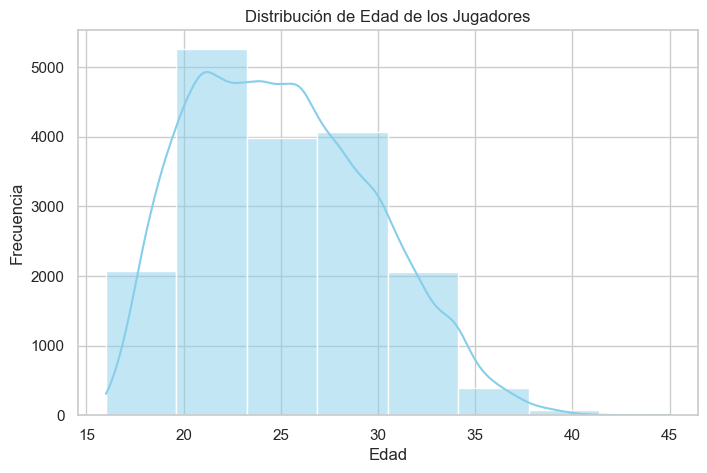

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(fifa['Age'], bins=8, kde=True, color='skyblue')
plt.title("Distribución de Edad de los Jugadores")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

+ Forma de la Distribución: La distribución es unimodal, lo que significa que tiene un pico principal. Visualmente, parece estar sesgada hacia la derecha (sesgo positivo). Esto indica que, si bien la mayoría de los jugadores se concentran en un rango de edad más joven, hay una cola que se extiende hacia edades mayores, aunque con menor frecuencia.

+ Pico Principal (Moda): La mayor concentración de jugadores se encuentra en el rango de edad de aproximadamente 20 a 25 años. Este es el grupo de edad más frecuente en el conjunto de datos.

+ Disminución Gradual: Después del pico, la frecuencia de jugadores disminuye gradualmente a medida que aumenta la edad. Hay una cantidad considerable de jugadores entre los 25 y 30 años, y luego la caída se hace más pronunciada.

+ Rango de Edad: El gráfico muestra jugadores desde aproximadamente los 16-17 años hasta alrededor de los 45 años. Sin embargo, la gran mayoría de los jugadores tienen menos de 35 años.

+ Jugadores Jóvenes: Existe una cantidad significativa de jugadores muy jóvenes, comenzando alrededor de los 16-17 años, y la frecuencia aumenta rápidamente hasta alcanzar el pico.

+ Jugadores Mayores: Si bien son menos numerosos, todavía hay jugadores representados en el juego hasta los 40-45 años, aunque su frecuencia es considerablemente baja en comparación con los grupos más jóvenes.

## Gráfico de dispersión

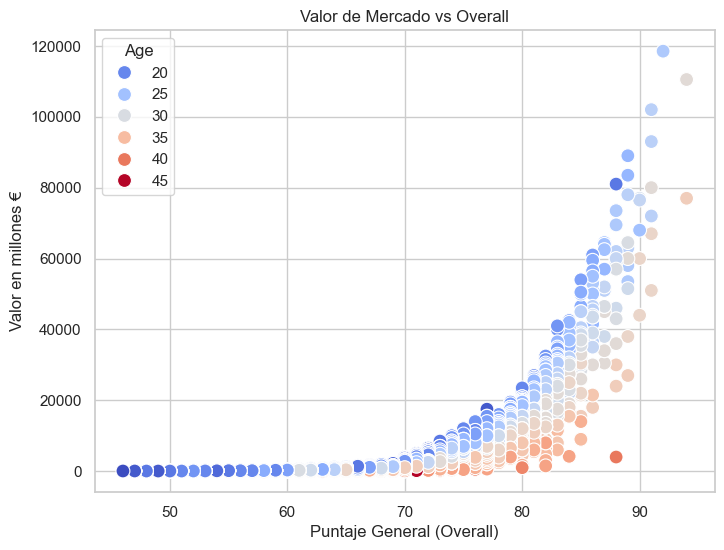

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=fifa, x="Overall", y="Value", hue="Age", palette="coolwarm", s=100)
plt.title("Valor de Mercado vs Overall")
plt.xlabel("Puntaje General (Overall)")
plt.ylabel("Valor en millones €")
plt.show()

+ Relación Positiva Fuerte entre Overall y Valor de Mercado: Se observa una clara tendencia positiva: a medida que aumenta el Puntaje General (Overall) de un jugador, su Valor de Mercado también tiende a aumentar significativamente. Esta relación parece ser exponencial, es decir, el valor aumenta mucho más rápidamente a medida que el Overall se acerca a los puntajes más altos.
+ Jugadores Jóvenes (tonos azules): Los jugadores más jóvenes (20-25 años) con un Overall alto tienden a tener valores de mercado muy elevados. Esto es esperable, ya que los jugadores jóvenes con alto potencial y rendimiento suelen ser muy cotizados. Incluso con Overalls moderados, los jugadores jóvenes pueden tener un valor apreciable.
+ Jugadores en su Pico (tonos blancos/celestes claros): Los jugadores en el rango de edad de 25 a 30 años, si tienen un Overall alto, también alcanzan valores de mercado muy altos. Esta franja de edad suele representar el pico de rendimiento para muchos futbolistas.
+ Jugadores Mayores (tonos naranjas y rojos): A medida que los jugadores envejecen (30 años en adelante), incluso con un Overall relativamente alto, su valor de mercado tiende a ser menor en comparación con jugadores más jóvenes con un Overall similar. Esto se debe a que tienen menos años de carrera por delante y su potencial de reventa es menor. Se puede ver cómo los puntos rojos y naranjas, incluso con Overalls de 80-85, no alcanzan los valores más altos del gráfico. Los jugadores de más de 35-40 años, aunque tengan un buen Overall, tienen valores de mercado considerablemente más bajos.
+ La mayoría de los jugadores se concentran en la parte inferior izquierda del gráfico, lo que indica que un gran número de jugadores tienen un Overall más bajo y, consecuentemente, un valor de mercado bajo.
+ Hay una menor cantidad de jugadores con Overalls muy altos (por encima de 85-90), y estos son los que alcanzan los valores de mercado más significativos.

## Gráfico de barras diferencia entre Potential y Overall

In [8]:
fifa["Potential_Gap"] = fifa["Potential"] - fifa["Overall"]
fifa.sort_values("Potential_Gap", ascending=False)[["Name", "Overall", "Potential", "Potential_Gap"]]

,Name,Overall,Potential,Potential_Gap
16028,J. von Moos,58,84,26
18072,D. Campbell,50,76,26
17175,B. Mumba,55,80,25
17784,K. Askildsen,52,77,25
16629,Y. Lenze,57,82,25
...,...,...,...,...
12024,S. Auer,64,64,0
12025,J. Mullins,64,64,0
12027,Perceval Acunha,64,64,0
12030,L. Collins,64,64,0


C:\Users\juand\AppData\Local\Temp\ipykernel_14964\2766928501.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gap, x="Potential_Gap", y="Name", palette="mako")


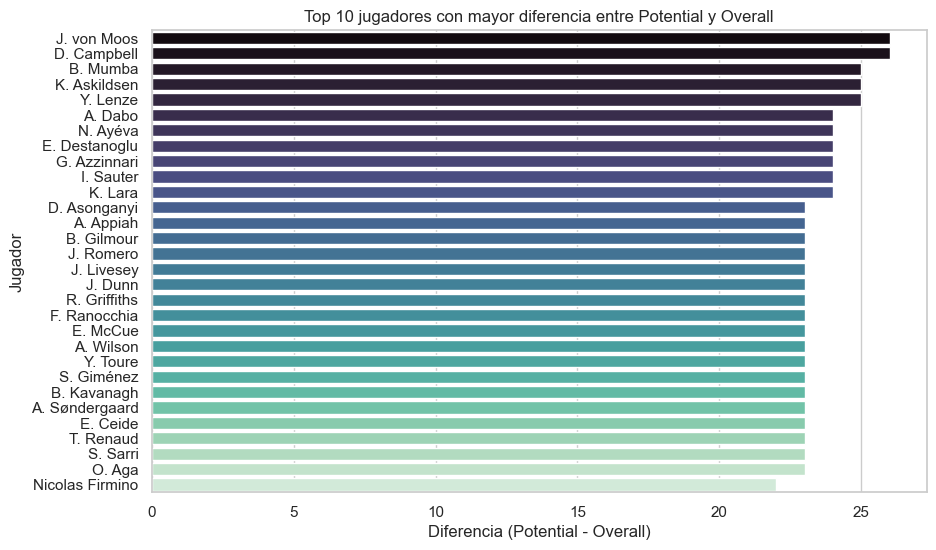

In [14]:
fifa["Potential_Gap"] = fifa["Potential"] - fifa["Overall"]

top_gap = fifa.sort_values("Potential_Gap", ascending=False).head(30)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_gap, x="Potential_Gap", y="Name", palette="mako")
plt.title("Top 10 jugadores con mayor diferencia entre Potential y Overall")
plt.xlabel("Diferencia (Potential - Overall)")
plt.ylabel("Jugador")
plt.show()

El gráfico muestra los 30 jugadores que tienen la mayor diferencia positiva entre su "Potential" (Potencial) y su "Overall" (Puntaje General actual). Esta diferencia indica cuánto se espera que un jugador mejore en el futuro. Un valor más alto significa un mayor margen de crecimiento proyectado.
+ Jugadores con mayor potencial de crecimiento: Los jugadores en la parte superior del gráfico (J. von Moos, D. Campbell, B. Mumba, etc.) son aquellos que tienen una diferencia más grande entre su potencial y su Overall actual. Esto sugiere que tienen un mayor margen de mejora y podrían convertirse en jugadores significativamente mejores en el futuro si alcanzan su potencial.
+ Jugadores con menor potencial de crecimiento (dentro del Top 30): Los jugadores en la parte inferior del gráfico (O. Aga, S. Sarri, T. Renaud, etc., hasta Nicolas Firmino) todavía tienen una diferencia positiva entre su potencial y su Overall, pero esta diferencia es menor en comparación con los jugadores de la parte superior. Esto indica que tienen menos margen de mejora en términos de su valoración general.
+ Tendencia: El gráfico claramente muestra una tendencia descendente en la diferencia entre potencial y Overall a medida que se desciende en la lista de jugadores. Esto es esperado ya que el gráfico está ordenado según esta diferencia.

## Gráfico de barras Top 10 nacionalidades con más jugadores

C:\Users\juand\AppData\Local\Temp\ipykernel_14964\1079262843.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette="mako")


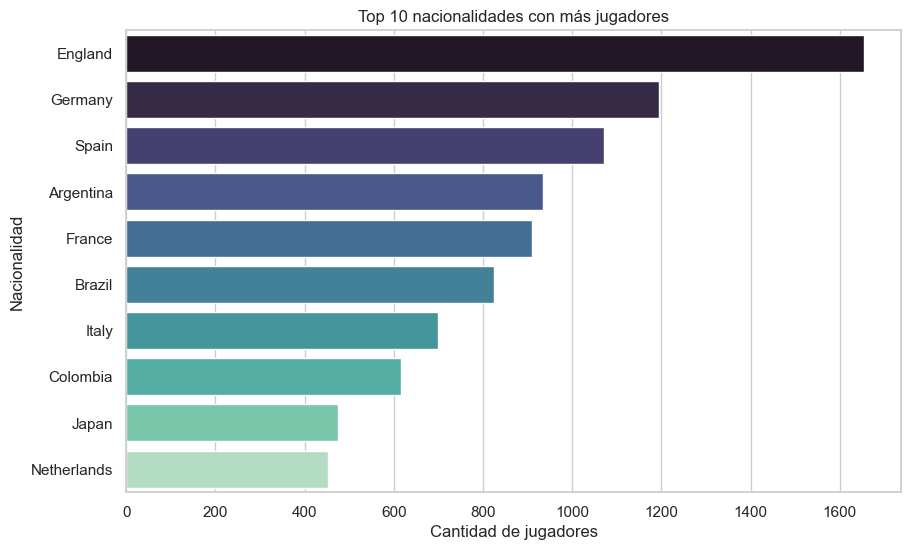

In [17]:
top_nationalities = fifa["Nationality"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_nationalities.values, y=top_nationalities.index, palette="mako")
plt.title("Top 10 nacionalidades con más jugadores")
plt.xlabel("Cantidad de jugadores")
plt.ylabel("Nacionalidad")
plt.show()

Cada barra horizontal corresponde a una nacionalidad y su longitud indica la cantidad de jugadores de esa nacionalidad. Las barras están coloreadas con un gradiente que va de un tono oscuro en la parte superior (mayor cantidad de jugadores) a un tono más claro en la parte inferior (menor cantidad de jugadores dentro del top 10).

+ Inglaterra es la nacionalidad con la mayor cantidad de jugadores, superando significativamente a las demás en este top 10.
+ Alemania y España ocupan el segundo y tercer lugar respectivamente, con una cantidad considerablemente menor de jugadores en comparación con Inglaterra, pero aún superior a las demás nacionalidades en la lista.
+ Colombia figura dentro de las 10 nacionalidades con más jugadores, aunque con una cantidad menor en comparación con las principales potencias futbolísticas representadas.
+ Los Países Bajos tienen la menor cantidad de jugadores dentro de este grupo de las 10 nacionalidades principales.

## Gráfico de cajas sobre el valor de mercado por posición (Sin Outliers)

In [ ]:
# Crear una nueva columna con la categoría de posición
def categorizar_posicion(pos):
    if pos in ['GK']:
        return 'Portero'
    elif pos in ['CB', 'LCB', 'RCB', 'LB', 'RB', 'LWB', 'RWB']:
        return 'Defensa'
    elif pos in ['CM', 'CDM', 'CAM', 'LM', 'RM', 'LCM', 'RCM', 'LAM', 'RAM', 'LDM', 'RDM']:
        return 'Mediocampista'
    elif pos in ['ST', 'CF', 'LW', 'RW', 'LS', 'RS', 'LF', 'RF']:
        return 'Delantero'
    else:
        return 'Otro'

fifa["Posición_Categoría"] = fifa["Position"].apply(categorizar_posicion)

C:\Users\juand\AppData\Local\Temp\ipykernel_14964\2029332838.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=fifa, x="Value", y="Posición_Categoría", palette="Set2", showfliers=False)


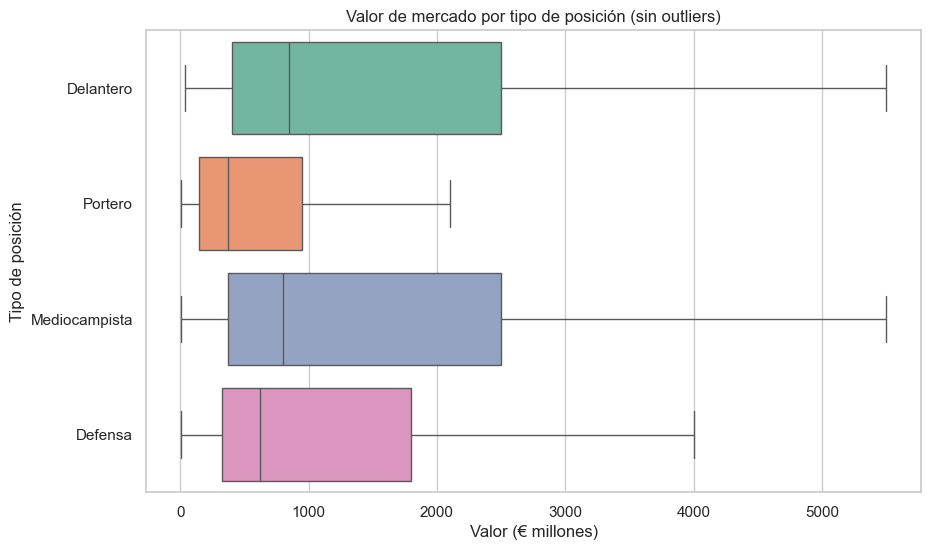

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fifa, x="Value", y="Posición_Categoría", palette="Set2", showfliers=False)
plt.title("Valor de mercado por tipo de posición (sin outliers)")
plt.xlabel("Valor (€ millones)")
plt.ylabel("Tipo de posición")
plt.show()


+ Delanteros: La caja para los delanteros se sitúa en valores de mercado relativamente altos, con una mediana superior a la de otras posiciones. El IQR es amplio, lo que indica una gran variabilidad en el valor de mercado de los delanteros. El bigote derecho se extiende significativamente, mostrando que, aunque se han excluido los outliers, todavía existen delanteros con valores de mercado muy elevados.
+ Porteros: La caja para los porteros se encuentra en valores de mercado considerablemente más bajos en comparación con los delanteros y mediocampistas. El IQR es relativamente pequeño, lo que sugiere una menor variabilidad en el valor de mercado de los porteros. El bigote derecho es también más corto, indicando que no hay porteros con valores de mercado extremadamente altos en este conjunto de datos (sin contar posibles outliers).
+ Mediocampistas: La distribución del valor de mercado para los mediocampistas es amplia, con una caja que se extiende a valores más altos que los porteros y una mediana también superior. El bigote derecho es largo, lo que indica la presencia de mediocampistas con valores de mercado muy altos.
+ Defensas: La caja para los defensas se sitúa en un rango de valores similar al de los mediocampistas, aunque quizás con una mediana ligeramente inferior. También presenta una variabilidad considerable, como se observa en el ancho de la caja. El bigote derecho también se extiende hacia valores altos, aunque quizás no tanto como el de los delanteros o mediocampistas.